<a href="https://colab.research.google.com/github/JBRo7/StocksPredict/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load The Imports

In [ ]:
from google.colab import files
import io
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 


CSV file was originally downloaded from Kaggle.

Address: https://www.kaggle.com/datasets/winston56/fortune-500-data-2021

File Name: Fortune_1000.csv

In [ ]:
#Load the CSV File
uploaded = files.upload()

#Select the OSMP_Trails.csv file.

Saving Fortune_1000.csv to Fortune_1000 (5).csv


##View the Data

In [ ]:
StocksDF = pd.read_csv(io.BytesIO(uploaded['Fortune_1000.csv']))
pd.options.display.max_columns = None

##Set the commas for thousand
#StocksDF = StocksDF.style.format(thousands=",")
##elminate the extra zeros


#RoundStocksDF = StocksDF['profit'].round(decimals=2)
#RoundStocksDF

StocksDF

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,,Guillermo Novo,https://www.ashland.com,ASH,5601.9


#Fix the Data

In [ ]:
#rename a column
StocksDF.rename({"Market Cap": "market_cap"}, axis =1, inplace = True)
StocksDF

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,market_cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,,Guillermo Novo,https://www.ashland.com,ASH,5601.9


In [ ]:
#Check the data types
StocksDF.dtypes

company               object
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees    float64
sector                object
city                  object
state                 object
newcomer              object
ceo_founder           object
ceo_woman             object
profitable            object
prev_rank             object
CEO                   object
Website               object
Ticker                object
market_cap            object
dtype: object

In [ ]:
# transform the objects
label = LabelEncoder()
label.fit(StocksDF.company)
StocksDF.company = label.transform(StocksDF.company)

label.fit(StocksDF.sector)
StocksDF.sector = label.transform(StocksDF.sector)

label.fit(StocksDF.city)
StocksDF.city = label.transform(StocksDF.city)

label.fit(StocksDF.state)
StocksDF.state = label.transform(StocksDF.state)

label.fit(StocksDF.newcomer)
StocksDF.newcomer = label.transform(StocksDF.newcomer)

label.fit(StocksDF.ceo_founder)
StocksDF.ceo_founder = label.transform(StocksDF.ceo_founder)

label.fit(StocksDF.ceo_woman)
StocksDF.ceo_woman = label.transform(StocksDF.ceo_woman)
label.fit(StocksDF.profitable)
StocksDF.profitable = label.transform(StocksDF.profitable)

label.fit(StocksDF.prev_rank)
StocksDF.prev_rank = label.transform(StocksDF.prev_rank)

label.fit(StocksDF.CEO)
StocksDF.CEO = label.transform(StocksDF.CEO)

label.fit(StocksDF.Website)
StocksDF.Website = label.transform(StocksDF.Website)

label.fit(StocksDF.Ticker)
StocksDF.Ticker = label.transform(StocksDF.Ticker)
label.fit(StocksDF.market_cap)
StocksDF.market_cap = label.transform(StocksDF.market_cap)

#Check the data types again
StocksDF.dtypes

company                int64
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees    float64
sector                 int64
city                   int64
state                  int64
newcomer               int64
ceo_founder            int64
ceo_woman              int64
profitable             int64
prev_rank              int64
CEO                    int64
Website                int64
Ticker                 int64
market_cap             int64
dtype: object

In [ ]:
#check for missing values
StocksDF.isna().sum()

company              0
rank                 0
rank_change          0
revenue              0
profit               3
num. of employees    1
sector               0
city                 0
state                0
newcomer             0
ceo_founder          0
ceo_woman            0
profitable           0
prev_rank            0
CEO                  0
Website              0
Ticker               0
market_cap           0
dtype: int64

In [ ]:
#Drop missing values
StocksDF.dropna(subset=["profit"], inplace = True)
StocksDF.dropna(subset=["num. of employees"], inplace = True)
StocksDF.isna().sum()

company              0
rank                 0
rank_change          0
revenue              0
profit               0
num. of employees    0
sector               0
city                 0
state                0
newcomer             0
ceo_founder          0
ceo_woman            0
profitable           0
prev_rank            0
CEO                  0
Website              0
Ticker               0
market_cap           0
dtype: int64

#Create A Model

##Regression prediction Model

In [ ]:
#Model to Create
#Seperate for X and y
X= StocksDF.drop("profit", axis=1)
y = StocksDF["profit"]

np.random.seed(42)

#set up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Machine learning Model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.05503951918853178

##Prediction with Regression

In [ ]:
np.random.seed(42)

#set up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Model
model = RandomForestRegressor()
#Fit the model
model.fit(X_train, y_train)
#predict
y_prediction = model.predict(X_test)

#Predictions
y_prediction[:10]

array([ 528.801,  437.333, 3220.296,  962.749, 1447.382, 1664.397,
       1787.917, 4134.307,  489.988,  865.558])

In [ ]:
#actual values
np.array(y_test[:10])

array([ 277.7,  266. ,  977.8,  241.4, 1353. , 1946.3,  336. , 5857.4,
       2126. , 1478. ])

In [ ]:
#Compare the Prediction
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_prediction)

1418.151875

##Prediction Ridge

In [ ]:
# setup random seed
np.random.seed(42)

#create data
X= StocksDF.drop("profit", axis=1)
y = StocksDF["profit"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate and fit the model 
model = Ridge()
model.fit(X_train, y_train)

#Check score of model on test set
model.score(X_test, y_test)

0.15049111241568758

#Compare results of the Ridge model with the actual values

In [ ]:
np.random.seed(42)

#set up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Model
model = Ridge()
#Fit the model
model.fit(X_train, y_train)
#predict
y_prediction = model.predict(X_test)

In [ ]:
#Predictions
y_prediction[:10]

array([-186.35712307, -922.95477508, 5620.35340831, 1344.29891536,
       1806.32026402, 2376.16065706, 1379.71558182, 3603.03913486,
        517.35838792, 1759.81852198])

In [ ]:
#actual values
np.array(y_test[:10])

array([ 277.7,  266. ,  977.8,  241.4, 1353. , 1946.3,  336. , 5857.4,
       2126. , 1478. ])

In [ ]:
#Compare the Prediction
print("The average difference between the actual values and the predicted values is:", mean_absolute_error(y_test, y_prediction))

The average difference between the actual values and the predicted values is: 1690.271658660394


##Make a prediction

In [ ]:
#Create a Slider for user inputs
Select_Company = 1 #@param {type:"slider", min:1, max:1000, step:1}
Select_Rank = 415 #@param {type:"slider", min:1, max:1000, step:1}
Select_rank_change = 419475 #@param {type:"slider", min:1, max:1000000, step:1}
Select_Revenue = 582728 #@param {type:"slider", min:1, max:1000000, step:1}
Select_num_Employees  = 417123 #@param {type:"slider", min:1, max:1000000, step:1}
Select_sector = 399501 #@param {type:"slider", min:1, max:1000000, step:1}
Select_city = 765166 #@param {type:"slider", min:1, max:1000000, step:1}
Select_state = 98879 #@param {type:"slider", min:1, max:1000000, step:1}
Select_newcomer = 565876 #@param {type:"slider", min:1, max:1000000, step:1}
Select_ceo_founder = 497330 #@param {type:"slider", min:1, max:1000000, step:1}
Select_ceo_woman = 466200 #@param {type:"slider", min:1, max:1000000, step:1}
Select_profitable = 555857 #@param {type:"slider", min:1, max:1000000, step:1}
Select_prev_rank = 482676 #@param {type:"slider", min:1, max:1000000, step:1}
Select_CEO = 472021 #@param {type:"slider", min:1, max:1000000, step:1}
Select_website = 499273 #@param {type:"slider", min:1, max:1000000, step:1}
Select_ticker = 524671 #@param {type:"slider", min:1, max:1000000, step:1}
Select_market_cap = 347144 #@param {type:"slider", min:1, max:1000000, step:1}




In [ ]:
#Provide prediction based on the user inputs
print("The Predicted profit is:\n", model.predict([[Select_Company, Select_Rank, Select_rank_change, Select_Revenue, 
                                                   Select_num_Employees, Select_sector, Select_city, Select_state, Select_newcomer, 
                                                   Select_ceo_founder, Select_ceo_woman, Select_profitable, Select_prev_rank, 
                                                   Select_CEO , Select_website, Select_ticker, Select_market_cap]]))
print("\n\n")

The Predicted profit is:
 [1.45248805e+09]





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


#Create tables


##Create a chart of Mileage and Height using the Best Fit Line

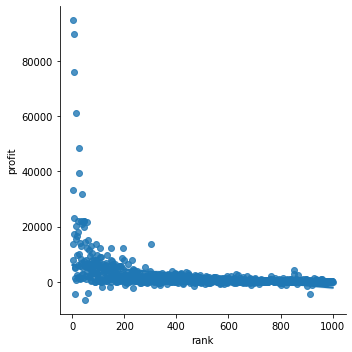

In [ ]:
sns.lmplot(x="rank", y="profit", data=StocksDF);

#this shows that the lower the rank the higher the profits are

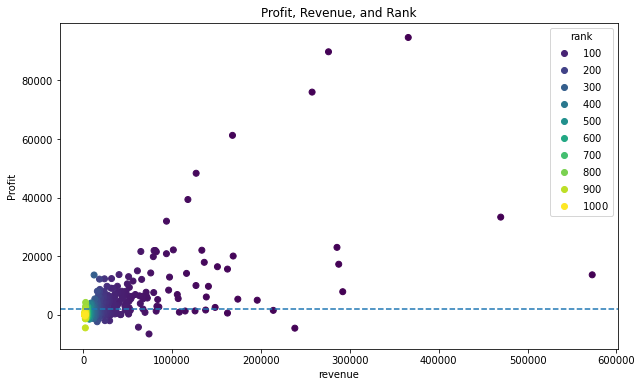

In [ ]:
#Creating a plot of the Mileage, Height, and Trail Type
fix, ax = plt.subplots(figsize = (10,6))
scatter = ax.scatter(x=StocksDF["revenue"], y=StocksDF["profit"], c=StocksDF["rank"]);

#Title
ax.set(title="Profit, Revenue, and Rank", xlabel = "revenue", ylabel= "Profit");

#legend
ax.legend(*scatter.legend_elements(), title= "rank")

#Horizontal Line
ax.axhline(StocksDF["profit"].mean(), linestyle='--')

#the Lower the rank, the higher the profits, and the higher the revenue

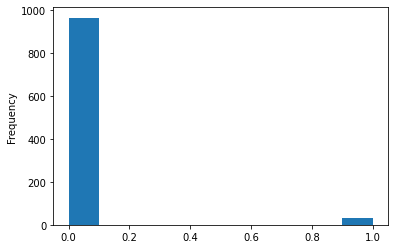

In [ ]:
#Histogram
StocksDF["newcomer"].plot.hist();

#this shows that most the companies are not new.

In [ ]:
#Show the data description
StocksDF.describe().T

,count,mean,std,min,25%,50%,75%,max
company,996.0,499.581325,288.916528,0.0,249.75,500.5,749.25,999.0
rank,996.0,499.860442,289.066788,1.0,249.75,499.0,750.25,1000.0
rank_change,996.0,-0.606426,31.735903,-178.0,-3.00,0.0,0.00,295.0
revenue,996.0,18040.268474,40886.380809,2107.2,3500.75,6403.3,14627.05,572754.0
profit,996.0,2028.376707,6424.523695,-6520.0,195.55,572.3,1498.65,94680.0
num. of employees,996.0,35871.827309,104800.808593,160.0,6500.00,13560.0,29000.00,2300000.0
sector,996.0,9.938755,5.648610,0.0,6.00,9.0,16.00,20.0
city,996.0,200.761044,113.932348,0.0,90.75,209.0,300.00,399.0
state,996.0,22.231928,14.083506,0.0,8.00,23.0,35.00,45.0
newcomer,996.0,0.030120,0.171005,0.0,0.00,0.0,0.00,1.0
